In [1]:
import quandl
dict_stock = {'Apple Inc.': 'AAPL',
        'Microsoft Corporation': 'MSFT',
        'Alphabet Inc.': 'GOOGL',
        'Amazon.com Inc.': 'AMZN',
        'Intel Corporation': 'INTC',
        'Cisco Systems, Inc.': 'CSCO',
        'NVIDIA Corporation': 'NVDA',
        'Adobe Inc.': 'ADBE',}
        # 'IBM': 'IBM',
        # 'Oracle Corporation': 'ORCL',
        # 'Salesforce.com Inc.': 'CRM',
        # 'Texas Instruments Incorporated': 'TXN',
        # 'Advanced Micro Devices, Inc.': 'AMD',
        # 'Applied Materials, Inc.': 'AMAT',
        # 'Qualcomm Incorporated': 'QCOM',
        # 'Johnson & Johnson': 'JNJ',
        # 'Pfizer Inc.': 'PFE',
        # 'Merck & Co., Inc.': 'MRK',
        # 'Roche Holding AG': 'ROG',
        # 'Abbott Laboratories': 'ABT',
        # 'Johnson & Johnson': 'JNJ',
        # 'Pfizer Inc.': 'PFE',
        # 'Merck & Co., Inc.': 'MRK',
        # 'Roche Holding AG': 'ROG',
        # 'Abbott Laboratories': 'ABT',
        # 'Bristol Myers Squibb Company': 'BMY',
        # 'Gilead Sciences, Inc.': 'GILD',
        # 'Eli Lilly and Company': 'LLY',
        # 'Amgen Inc.': 'AMGN',
        # 'Biogen Inc.': 'BIIB',
        # 'Thermo Fisher Scientific Inc.': 'TMO',
        # 'Regeneron Pharmaceuticals, Inc.': 'REGN',
        # 'Vertex Pharmaceuticals Incorporated': 'VRTX',
        # 'Exxon Mobil Corporation': 'XOM',
        # 'Chevron Corporation': 'CVX',
        # 'BP plc': 'BP',
        # 'ConocoPhillips': 'COP',
        # 'Schlumberger Limited': 'SLB',
        # 'Kinder Morgan, Inc.': 'KMI',
        # 'EOG Resources, Inc.': 'EOG',
        # 'Valero Energy Corporation': 'VLO',
        # 'Phillips 66': 'PSX',
        # 'Occidental Petroleum Corporation': 'OXY',
        # 'EOG Resources, Inc.': 'EOG',
        # 'Procter & Gamble Company': 'PG',
        # 'The Coca-Cola Company': 'KO',
        # 'PepsiCo, Inc.': 'PEP',
        # 'Colgate-Palmolive Company': 'CL',
        # 'The Hershey Company': 'HSY',
        # 'The Estée Lauder Companies Inc.': 'EL',
        # 'Mondelez International, Inc.': 'MDLZ',
        # 'Clorox Company': 'CLX',
        # 'Kimberly-Clark Corporation': 'KMB',
        # 'General Mills, Inc.': 'GIS',
        # 'The Kraft Heinz Company': 'KHC',
        # 'Molson Coors Beverage Company': 'TAP',
        # 'Constellation Brands, Inc.': 'STZ',
        # 'Church & Dwight Co., Inc.': 'CHD',}
quandl.ApiConfig.api_key = 'zs3oRyjDLfSoEpPRFxKJ'
data_dfs = {}
for name in dict_stock.keys():
    data_dfs[name] = quandl.get('WIKI/'+dict_stock[name])
data_dfs = {key:value.iloc[:,7:] for key, value in data_dfs.items()}

In [41]:
data_dfs['Apple Inc.']

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
1980-12-12,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,0.391536,0.393300,0.391536,0.391536,18362400.0
...,...,...,...,...,...
2018-03-21,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.390000,169.920000,164.940000,164.940000,40248954.0


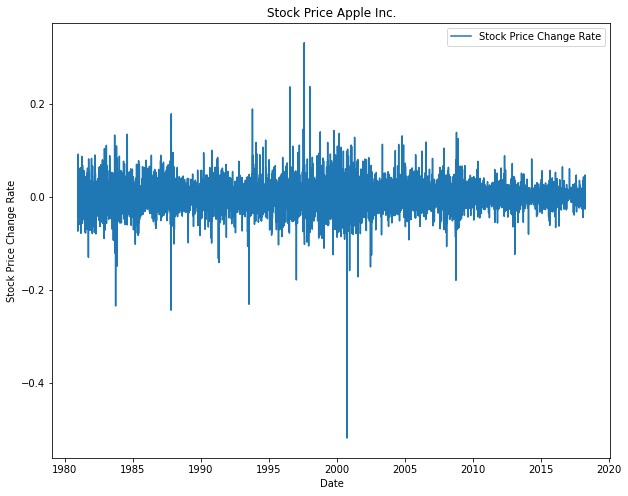

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

y = data_dfs['Apple Inc.']["Adj. Close"].pct_change().dropna()

plt.figure(figsize=(10, 8))
plt.plot(y, label='Stock Price Change Rate')
plt.title('Stock Price'+" "+'Apple Inc.')
plt.xlabel('Date')
plt.ylabel('Stock Price Change Rate')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


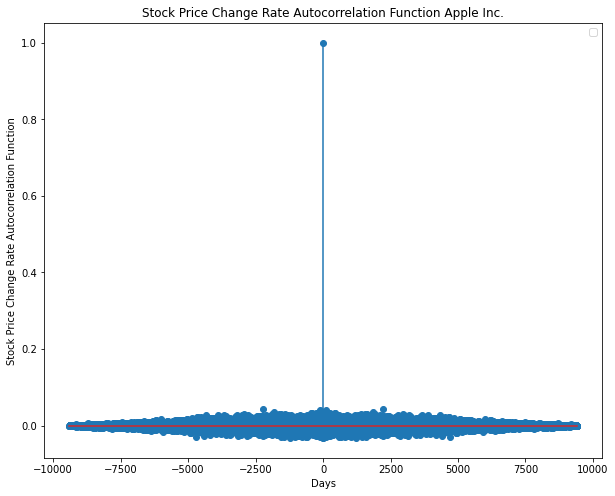

In [18]:
import numpy as np

train_y = y
plt.figure(figsize=(10, 8))
autocorrelation = np.correlate(train_y, train_y, mode='full')
autocorrelation /= np.max(autocorrelation)
lags = np.arange(-len(train_y) + 1, len(train_y))
plt.stem(lags, autocorrelation, use_line_collection=True)
plt.title('Stock Price Change Rate Autocorrelation Function'+" "+'Apple Inc.')
plt.xlabel('Days')
plt.ylabel('Stock Price Change Rate Autocorrelation Function')
plt.legend()
plt.show()

## First Task: Predict Stock Price itself using Random Forest

In [32]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def create_all_date(data_dfs):
    def create_data(data, input_days, output_days):
        sequences = []
        targets = []
        for i in range(len(data) - input_days - output_days + 1):
            seq = data[i:i+input_days,:]
            target = data[i+input_days:i+input_days+output_days,3]
            sequences.append(seq)
            targets.append(target)

        return np.stack(sequences), np.stack(targets)

    train_X_all = np.array([])
    train_y_all = np.array([])
    train_X_dict = {}
    train_y_dict = {}
    test_X_dict = {}
    test_y_dict = {}
    scaler_dict = {}

    for key,val in data_dfs.items():
        scaler = MinMaxScaler()
        val_2 = val.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0)
        val = pd.merge(val, val_2, on='Date', how='inner')
        # print(val.shape)
        df_standardized_array = scaler.fit_transform(val)
        scaler_dict[key] = scaler
        X, y = create_data(df_standardized_array, 10, 1)
        train_size = int(0.97 * X.shape[0])
        train_X, test_X = X[:train_size,:], X[train_size:,:]
        train_y, test_y = y[:train_size,:], y[train_size:,:]
        train_X = train_X.reshape((train_X.shape[0], -1))
        test_X = test_X.reshape((test_X.shape[0], -1))
        train_X_dict[key] = train_X
        train_y_dict[key] = train_y
        test_X_dict[key] = test_X
        test_y_dict[key] = test_y
        print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
        if train_X_all.shape == (0,):
            train_X_all = train_X
        else:
            train_X_all = np.vstack((train_X_all, train_X))
        if train_y_all.shape == (0,):
            train_y_all = train_y
        else:
            train_y_all = np.vstack((train_y_all, train_y))

    train_X_all = train_X_all.reshape((train_X_all.shape[0], -1) )

    print("train_data_X shape: ",train_X_all.shape, "\n" ,"train_data_y shape: ", train_y_all.shape)
    return train_X_all, train_y_all, train_X_dict, train_y_dict, test_X_dict, test_y_dict, scaler_dict

train_X_all, train_y_all, train_X_dict, train_y_dict, test_X_dict, test_y_dict, scaler_dict = create_all_date(data_dfs)


(9108, 100) (9108, 1) (282, 100) (282, 1)
(7824, 100) (7824, 1) (242, 100) (242, 1)
(3311, 100) (3311, 1) (103, 100) (103, 1)
(5080, 100) (5080, 1) (158, 100) (158, 1)
(9291, 100) (9291, 1) (288, 100) (288, 1)
(6834, 100) (6834, 1) (212, 100) (212, 1)
(4670, 100) (4670, 1) (145, 100) (145, 1)
(7719, 100) (7719, 1) (239, 100) (239, 1)
(13720, 100) (13720, 1) (425, 100) (425, 1)
(7824, 100) (7824, 1) (243, 100) (243, 1)
(3350, 100) (3350, 1) (104, 100) (104, 1)
(11199, 100) (11199, 1) (347, 100) (347, 1)
(8554, 100) (8554, 1) (265, 100) (265, 1)
(8194, 100) (8194, 1) (254, 100) (254, 1)
(6409, 100) (6409, 1) (199, 100) (199, 1)
train_data_X shape:  (113087, 100) 
 train_data_y shape:  (113087, 1)


In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_regressor.fit(train_X_all, train_y_all)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9588\388117384.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(train_X_all, train_y_all)


RandomForestRegressor(n_jobs=-1, random_state=42)

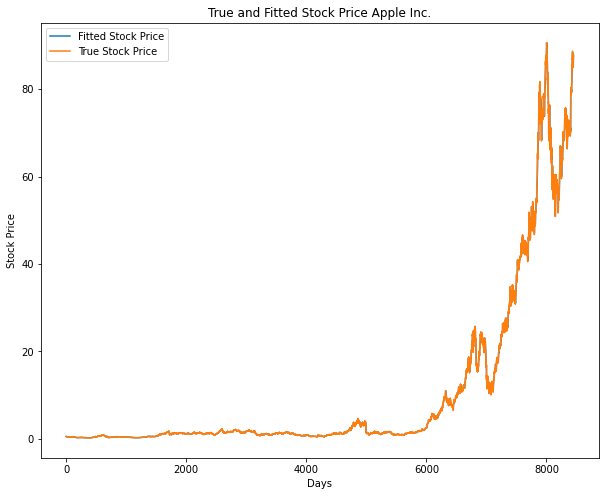

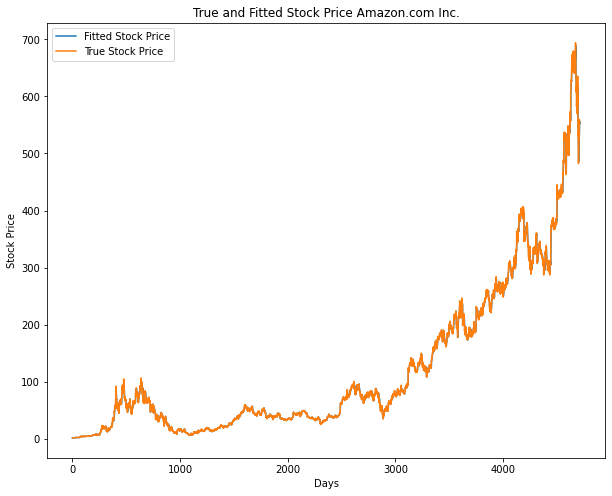

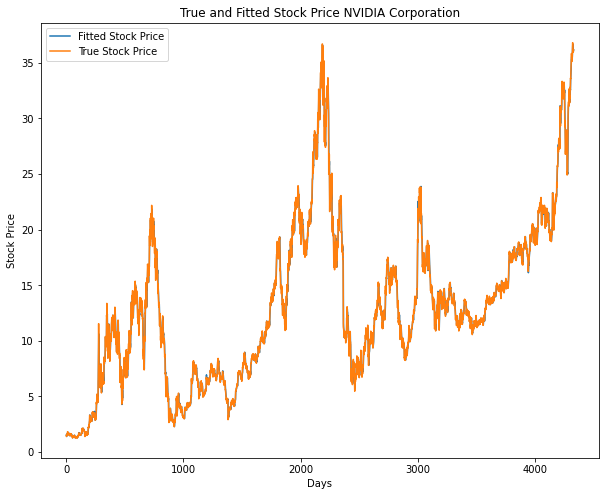

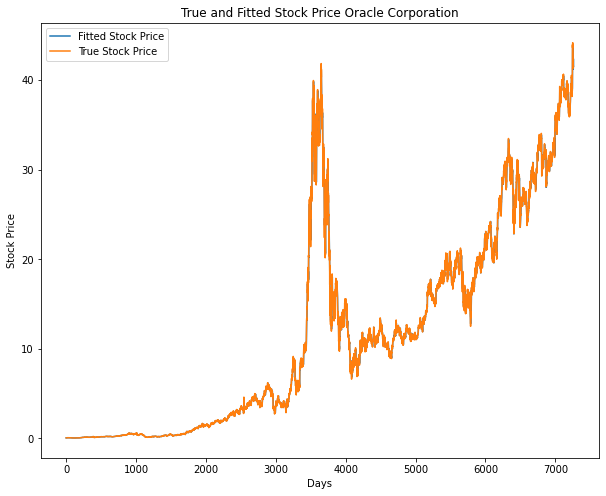

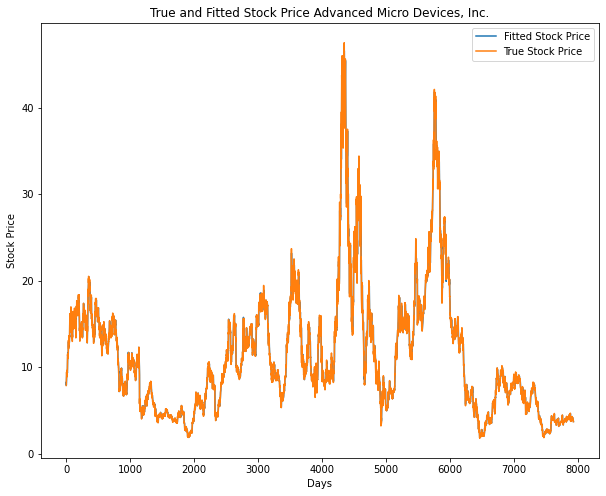

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_stock_fit(model, name, window_size):
    train_X = train_X_dict[name]
    train_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(train_y_dict[name].shape[0], 3), train_y_dict[name], np.random.rand(train_y_dict[name].shape[0], 6)), axis=1))[:,3].reshape(-1, 1)
    fit_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(train_y_dict[name].shape[0], 3), model.predict(train_X).reshape(-1, 1), np.random.rand(train_y_dict[name].shape[0], 6)), axis=1))[:,3]
    plt.figure(figsize=(10, 8))
    plt.plot(np.array(pd.Series(fit_y.flatten()).rolling(window=window_size).mean()), label='Fitted Stock Price')
    plt.plot(train_y[window_size:], label='True Stock Price')
    plt.title('True and Fitted Stock Price'+" "+name)
    plt.xlabel('Days')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

for name in list(dict_stock.keys())[0::3]:
    plot_stock_fit(rf_regressor, name, 1)

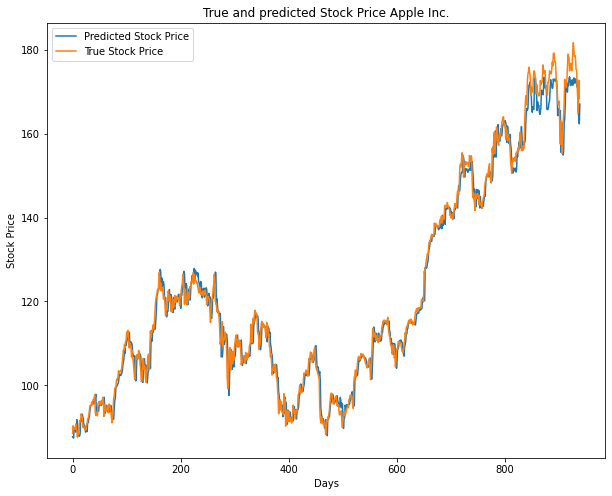

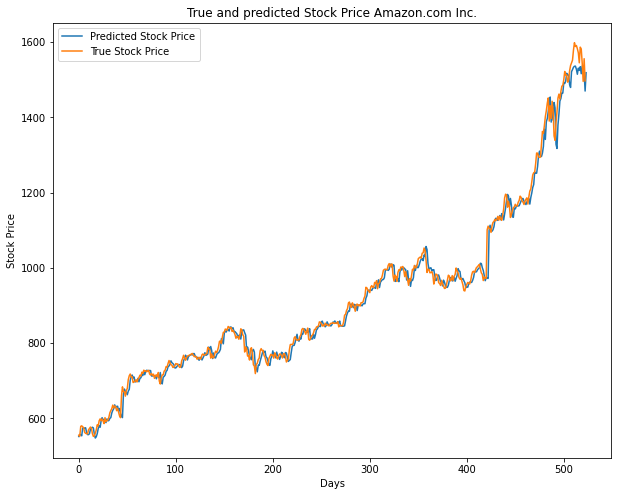

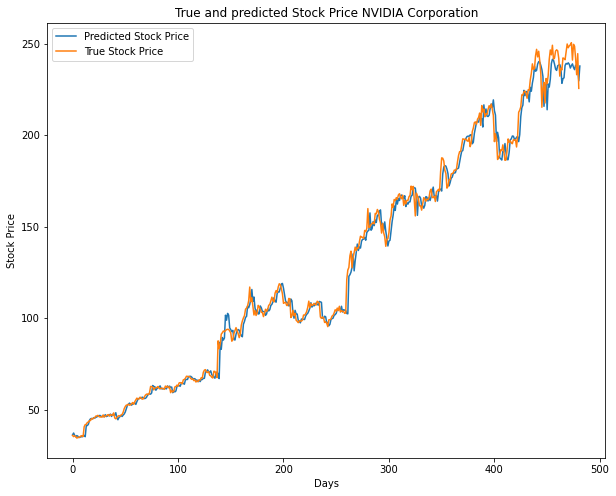

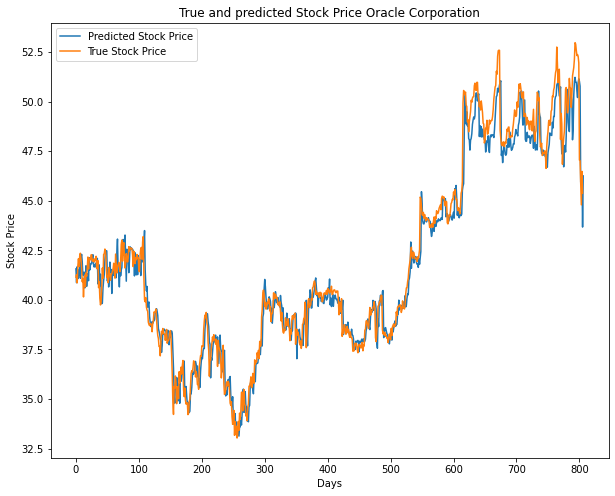

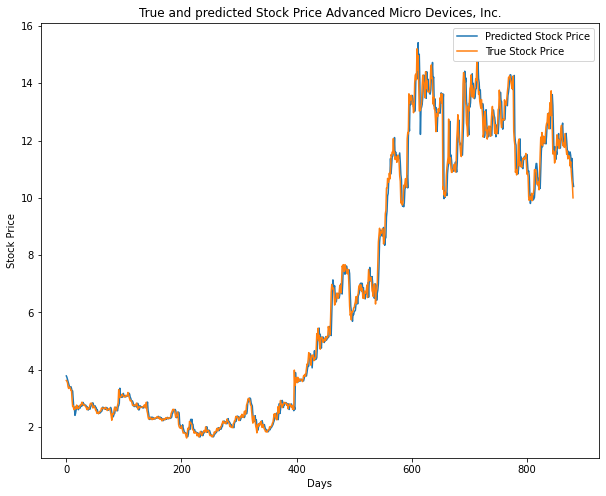

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_stock_predict(model, name, window_size):
    test_X = test_X_dict[name]
    test_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(test_y_dict[name].shape[0], 3), test_y_dict[name], np.random.rand(test_y_dict[name].shape[0], 6)), axis=1))[:,3].reshape(-1, 1)
    pred_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(test_y_dict[name].shape[0], 3), model.predict(test_X).reshape(-1, 1), np.random.rand(test_y_dict[name].shape[0], 6)), axis=1))[:,3]
    plt.figure(figsize=(10, 8))
    plt.plot(np.array(pd.Series(pred_y.flatten()).rolling(window=window_size).mean()), label='Predicted Stock Price')
    plt.plot(test_y[window_size:], label='True Stock Price')
    plt.title('True and predicted Stock Price'+" "+name)
    plt.xlabel('Days')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

for name in list(dict_stock.keys())[0::3]:
    plot_stock_predict(rf_regressor, name, 1)

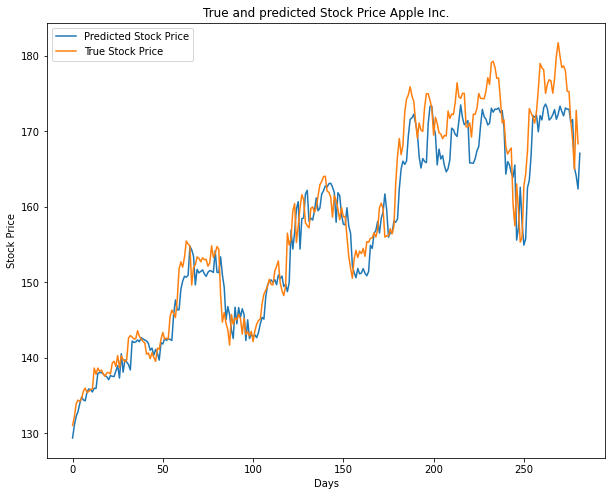

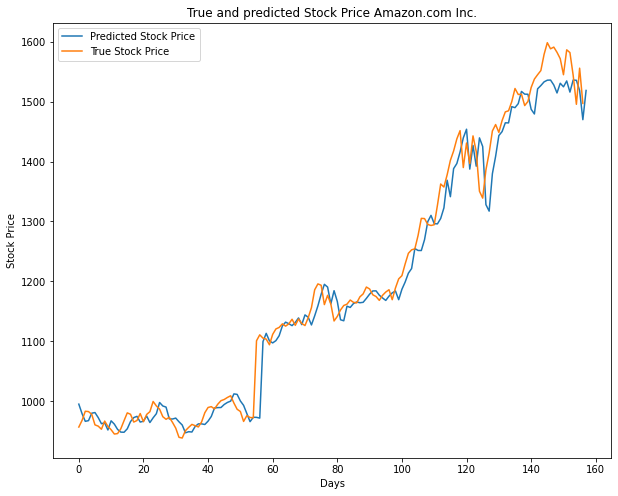

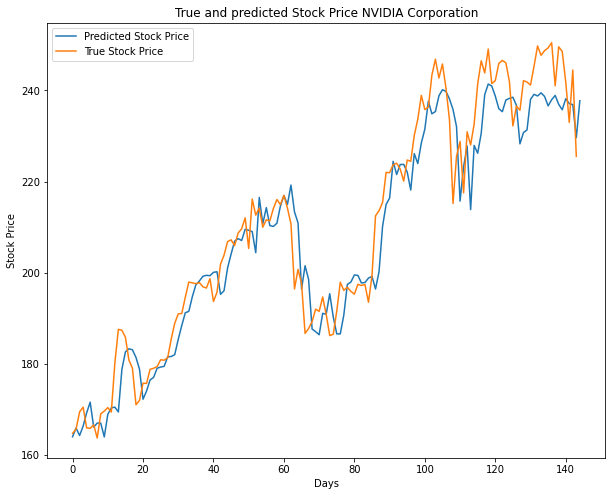

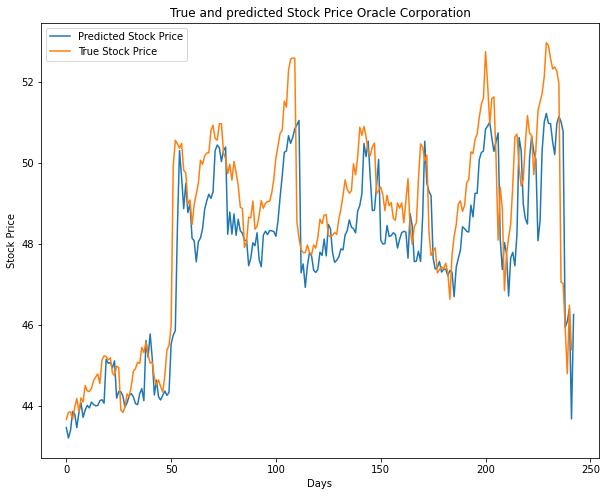

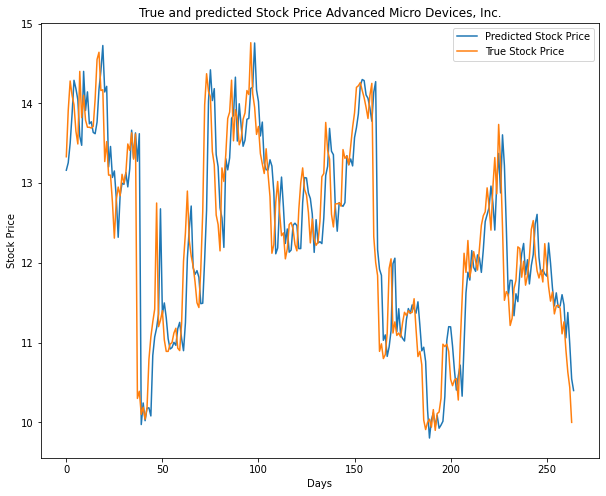

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_stock_predict(model, name, window_size):
    test_X = test_X_dict[name]
    test_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(test_y_dict[name].shape[0], 3), test_y_dict[name], np.random.rand(test_y_dict[name].shape[0], 6)), axis=1))[:,3].reshape(-1, 1)
    pred_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(test_y_dict[name].shape[0], 3), model.predict(test_X).reshape(-1, 1), np.random.rand(test_y_dict[name].shape[0], 6)), axis=1))[:,3]
    plt.figure(figsize=(10, 8))
    plt.plot(np.array(pd.Series(pred_y.flatten()).rolling(window=window_size).mean()), label='Predicted Stock Price')
    plt.plot(test_y[window_size:], label='True Stock Price')
    plt.title('True and predicted Stock Price'+" "+name)
    plt.xlabel('Days')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

for name in list(dict_stock.keys())[0::3]:
    plot_stock_predict(rf_regressor, name, 1)

#### Here we can see that Amazon and Alphabet indeed have the highest prices

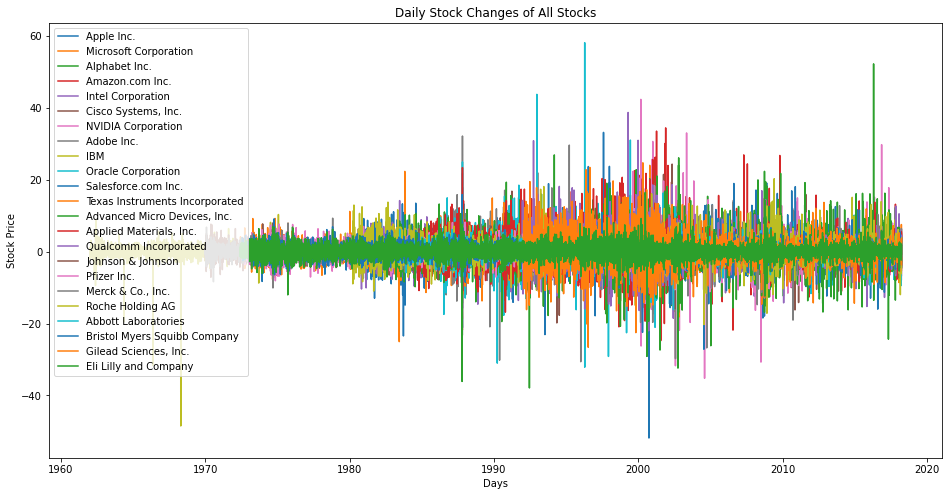

In [65]:
plt.figure(figsize=(16, 8))

for name in data_dfs:
    plt.plot(data_dfs[name].iloc[:,3].pct_change() * 100 ,label=name)

plt.title('Daily Stock Changes of All Stocks')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [57]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def create_all_date(data_dfs):
    def create_data(data, input_days, output_days):
        sequences = []
        targets = []
        for i in range(len(data) - input_days - output_days + 1):
            seq = data[i:i+input_days,:]
            target = data[i+input_days:i+input_days+output_days,8]
            sequences.append(seq)
            targets.append(target)

        return np.stack(sequences), np.stack(targets)

    train_X_all = np.array([])
    train_y_all = np.array([])
    train_X_dict = {}
    train_y_dict = {}
    test_X_dict = {}
    test_y_dict = {}
    scaler_dict = {}

    for key,val in data_dfs.items():
        scaler = MinMaxScaler()
        val_2 = val.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0)
        val = pd.merge(val, val_2, on='Date', how='inner')
        # print(val_2.mean())
        df_standardized_array = scaler.fit_transform(val)
        scaler_dict[key] = scaler
        X, y = create_data(df_standardized_array, 20, 1)
        train_size = int(0.9 * X.shape[0])
        train_X, test_X = X[:train_size,:], X[train_size:,:]
        train_y, test_y = y[:train_size,:], y[train_size:,:]
        train_X = train_X.reshape((train_X.shape[0], -1))
        test_X = test_X.reshape((test_X.shape[0], -1))
        train_X_dict[key] = train_X
        train_y_dict[key] = train_y
        test_X_dict[key] = test_X
        test_y_dict[key] = test_y
        print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
        if train_X_all.shape == (0,):
            train_X_all = train_X
        else:
            train_X_all = np.vstack((train_X_all, train_X))
        if train_y_all.shape == (0,):
            train_y_all = train_y
        else:
            train_y_all = np.vstack((train_y_all, train_y))

    train_X_all = train_X_all.reshape((train_X_all.shape[0], -1) )

    print("train_data_X shape: ",train_X_all.shape, "\n" ,"train_data_y shape: ", train_y_all.shape)
    return train_X_all, train_y_all, train_X_dict, train_y_dict, test_X_dict, test_y_dict, scaler_dict

train_X_all, train_y_all, train_X_dict, train_y_dict, test_X_dict, test_y_dict, scaler_dict = create_all_date(data_dfs)

(8442, 200) (8442, 1) (938, 200) (938, 1)
(7250, 200) (7250, 1) (806, 200) (806, 1)
(3063, 200) (3063, 1) (341, 200) (341, 1)
(4705, 200) (4705, 1) (523, 200) (523, 1)
(8612, 200) (8612, 1) (957, 200) (957, 1)
(6332, 200) (6332, 1) (704, 200) (704, 1)
(4324, 200) (4324, 1) (481, 200) (481, 1)
(7153, 200) (7153, 1) (795, 200) (795, 1)
train_data_X shape:  (49881, 200) 
 train_data_y shape:  (49881, 1)


In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_regressor.fit(train_X_all, train_y_all)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15848\388117384.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(train_X_all, train_y_all)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
train_X_all

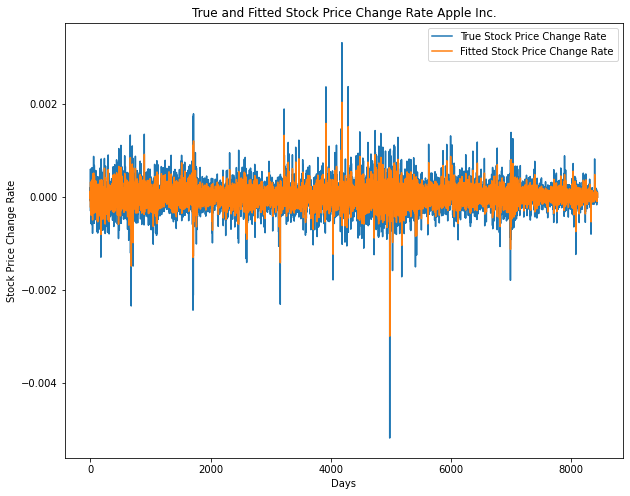

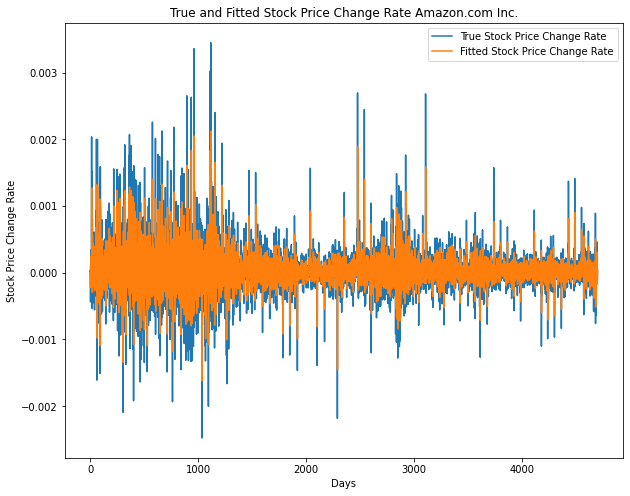

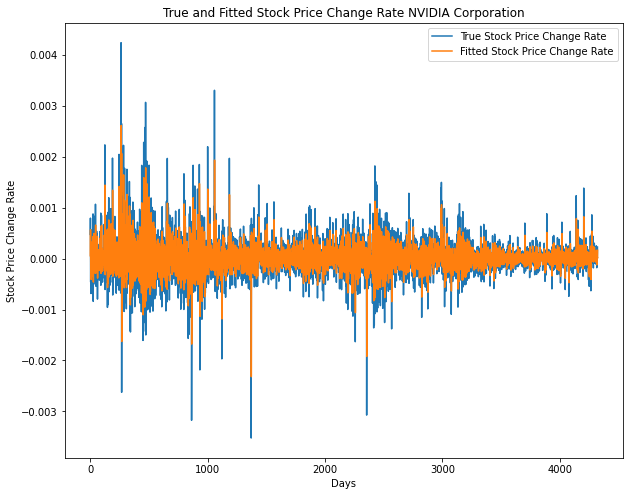

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_stock_fit(model, name, window_size):
    train_X = train_X_dict[name]
    train_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(train_y_dict[name].shape[0], 8), train_y_dict[name], np.random.rand(train_y_dict[name].shape[0], 1)), axis=1))[:,8].reshape(-1, 1)
    fit_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(train_y_dict[name].shape[0], 8), model.predict(train_X).reshape(-1, 1), np.random.rand(train_y_dict[name].shape[0], 1)), axis=1))[:,8]
    plt.figure(figsize=(10, 8))
    plt.plot(train_y[window_size:]/100, label='True Stock Price Change Rate')
    plt.plot(np.array(pd.Series(fit_y.flatten()/100).rolling(window=window_size).mean()), label='Fitted Stock Price Change Rate')
    plt.title('True and Fitted Stock Price Change Rate'+" "+name)
    plt.xlabel('Days')
    plt.ylabel('Stock Price Change Rate')
    plt.legend()
    plt.show()

for name in list(dict_stock.keys())[0::3]:
    plot_stock_fit(rf_regressor, name, 1)

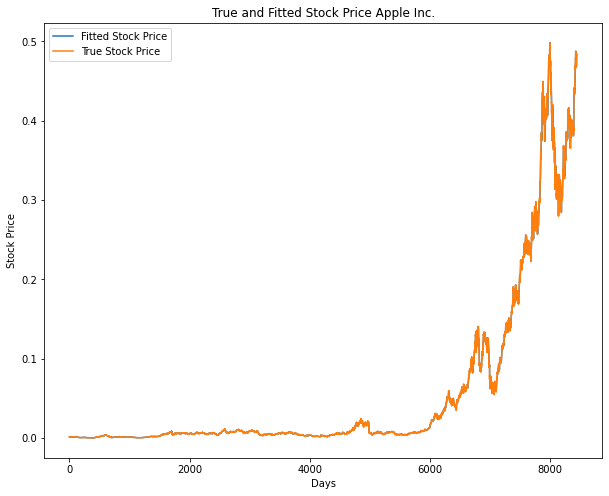

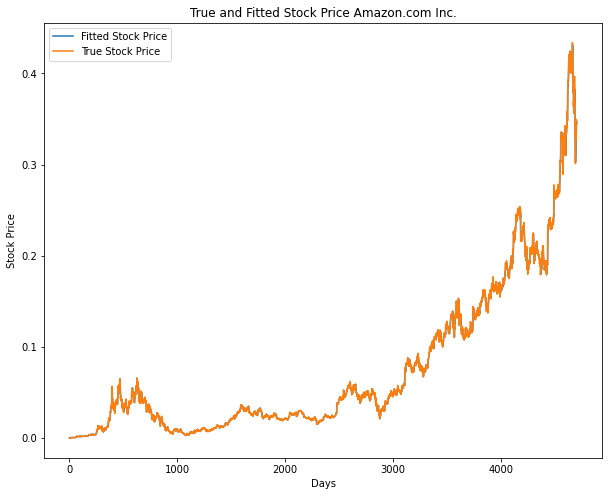

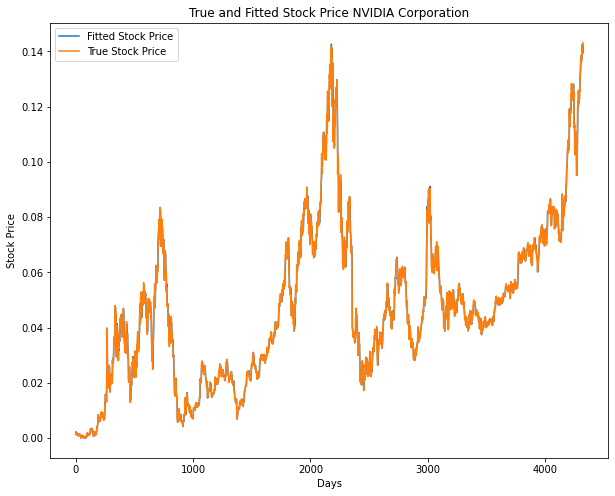

In [42]:
def plot_stock_fit_price(model, name, window_size):
    train_X = train_X_dict[name]
    train_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(train_y_dict[name].shape[0], 8), train_y_dict[name], np.random.rand(train_y_dict[name].shape[0], 1)), axis=1))[:,8].reshape(-1, 1)
    fit_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(train_y_dict[name].shape[0], 8), model.predict(train_X).reshape(-1, 1), np.random.rand(train_y_dict[name].shape[0], 1)), axis=1))[:,8]
    # print(train_X.shape, train_y.shape, fit_y.shape, )
    fit_y_price = train_X[:,-7].reshape(-1, 1)*(1+fit_y).reshape(-1, 1)
    train_y_price = train_X[:,-7].reshape(-1, 1)*(1+train_y).reshape(-1, 1)
    plt.figure(figsize=(10, 8))
    plt.plot(np.array(pd.Series(fit_y_price.flatten()).rolling(window=window_size).mean()), label='Fitted Stock Price')
    plt.plot(train_y_price[window_size:], label='True Stock Price')
    plt.title('True and Fitted Stock Price'+" "+name)
    plt.xlabel('Days')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

for name in list(dict_stock.keys())[0::3]:
    plot_stock_fit_price(rf_regressor, name, 1)

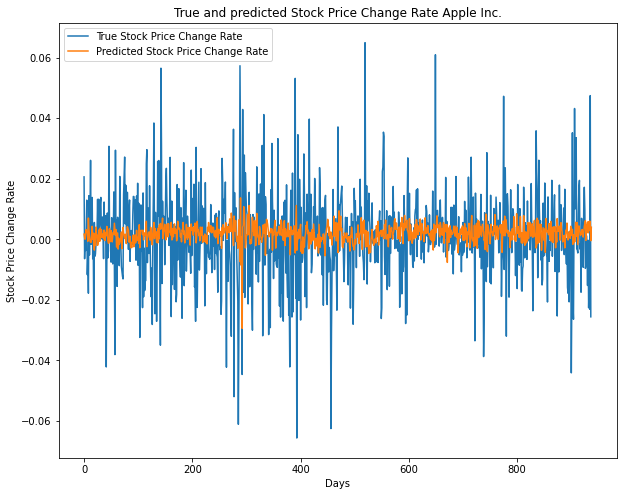

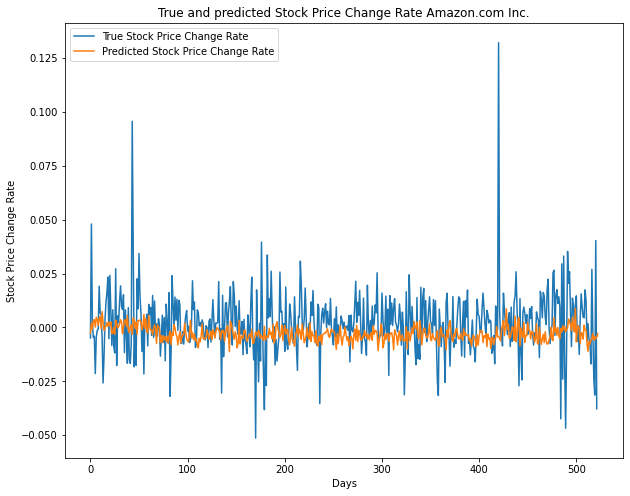

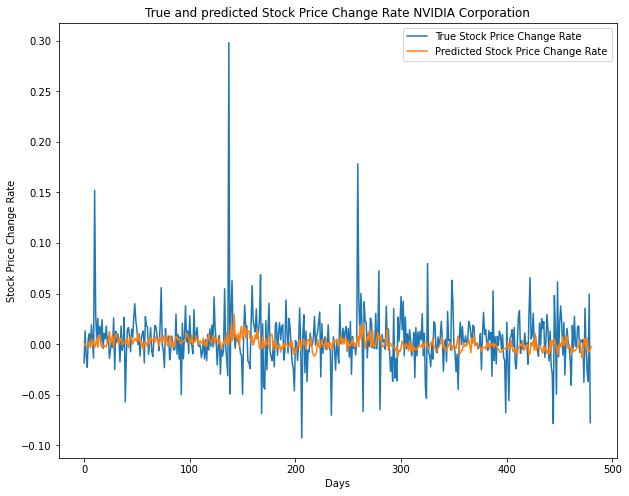

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_stock_predict(model, name, window_size):
    test_X = test_X_dict[name]
    test_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(test_y_dict[name].shape[0], 8), test_y_dict[name], np.random.rand(test_y_dict[name].shape[0], 1)), axis=1))[:,8].reshape(-1, 1)
    pred_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(test_y_dict[name].shape[0], 8), model.predict(test_X).reshape(-1, 1), np.random.rand(test_y_dict[name].shape[0], 1)), axis=1))[:,8]
    plt.figure(figsize=(10, 8))
    plt.plot(test_y[window_size:], label='True Stock Price Change Rate')
    plt.plot(np.array(pd.Series(pred_y.flatten()).rolling(window=window_size).mean()), label='Predicted Stock Price Change Rate')
    plt.title('True and predicted Stock Price Change Rate'+" "+name)
    plt.xlabel('Days')
    plt.ylabel('Stock Price Change Rate')
    plt.legend()
    plt.show()

for name in list(dict_stock.keys())[0::3]:
    plot_stock_predict(rf_regressor, name, 1)

In [63]:
from sklearn.metrics import mean_squared_error
def plot_stock_predict(model, name, window_size):
    test_X = test_X_dict[name]
    test_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(test_y_dict[name].shape[0], 8), test_y_dict[name], np.random.rand(test_y_dict[name].shape[0], 1)), axis=1))[:,8].reshape(-1, 1)
    pred_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(test_y_dict[name].shape[0], 8), model.predict(test_X).reshape(-1, 1), np.random.rand(test_y_dict[name].shape[0], 1)), axis=1))[:,8]
    print(name, "predicted mse", mean_squared_error(test_y,pred_y), "baseline mse", mean_squared_error(test_y,[0]*len(test_y)))

for name in list(dict_stock.keys())[0::]:
    plot_stock_predict(rf_regressor, name, 1)

Apple Inc. predicted mse 0.00021840625690501905 baseline mse 0.00020752617351123276
Amazon.com Inc. predicted mse 0.0002373968716895719 baseline mse 0.00021568417619519475
NVIDIA Corporation predicted mse 0.0008408068317255663 baseline mse 0.0008286209296190977


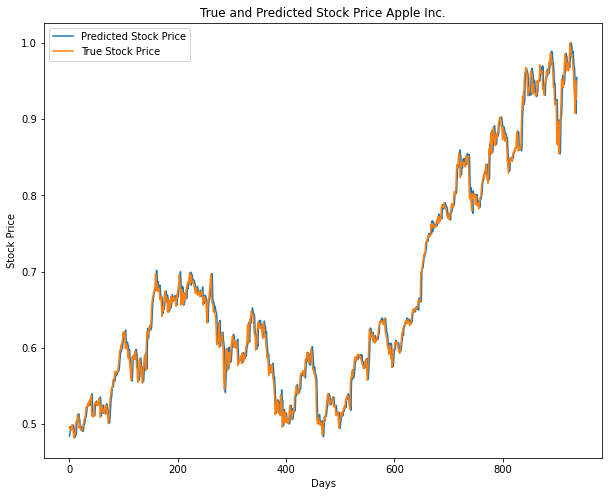

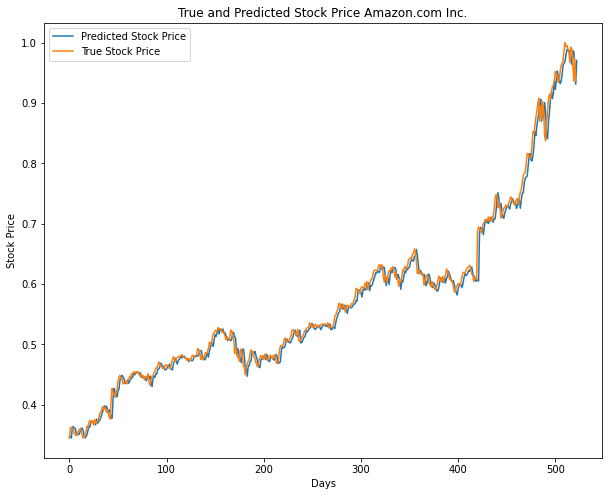

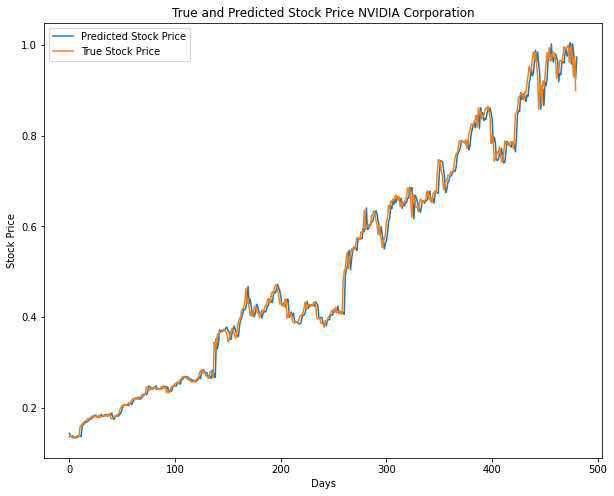

In [44]:
def plot_stock_pred_price(model, name, window_size):
    test_X = test_X_dict[name]
    test_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(test_y_dict[name].shape[0], 8), test_y_dict[name], np.random.rand(test_y_dict[name].shape[0], 1)), axis=1))[:,8].reshape(-1, 1)
    pred_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(test_y_dict[name].shape[0], 8), model.predict(test_X).reshape(-1, 1), np.random.rand(test_y_dict[name].shape[0], 1)), axis=1))[:,8]
    # print(train_X.shape, train_y.shape, fit_y.shape, )
    fit_y_price = test_X[:,-7].reshape(-1, 1)*(1+pred_y).reshape(-1, 1)
    train_y_price = test_X[:,-7].reshape(-1, 1)*(1+test_y).reshape(-1, 1)
    plt.figure(figsize=(10, 8))
    plt.plot(np.array(pd.Series(fit_y_price.flatten()).rolling(window=window_size).mean()), label='Predicted Stock Price')
    plt.plot(train_y_price[window_size:], label='True Stock Price')
    plt.title('True and Predicted Stock Price'+" "+name)
    plt.xlabel('Days')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

for name in list(dict_stock.keys())[0::3]:
    plot_stock_pred_price(rf_regressor, name, 1)

In [60]:
from sklearn.metrics import mean_squared_error

best_model = rf_regressor

def cacl_pred_mse(model, name):
    test_X = test_X_dict[name]
    test_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(test_y_dict[name].shape[0], 8), test_y_dict[name], np.random.rand(test_y_dict[name].shape[0], 1)), axis=1))[:,8].reshape(-1, 1)
    pred_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(test_y_dict[name].shape[0], 8), model.predict(test_X).reshape(-1, 1), np.random.rand(test_y_dict[name].shape[0], 1)), axis=1))[:,8]
    pred_y_price = test_X[:,-7].reshape(-1, 1)*(1+pred_y).reshape(-1, 1)
    test_y_price = test_X[:,-7].reshape(-1, 1)*(1+test_y).reshape(-1, 1)
    return mean_squared_error(test_y_price , pred_y_price )

def get_pred_mse():
    mse_dict = {}
    for name in dict_stock.keys():
        mse_dict[name] = cacl_pred_mse(best_model, name)
    return mse_dict

def cacl_baseline_mse(name):
    test_X = test_X_dict[name]
    test_y = scaler_dict[name].inverse_transform(np.concatenate((np.random.rand(test_y_dict[name].shape[0], 8), test_y_dict[name], np.random.rand(test_y_dict[name].shape[0], 1)), axis=1))[:,8].reshape(-1, 1)
    pred_y = test_y[1:]
    test_y = test_y[:-1]
    pred_y_price = test_X[1:,-7].reshape(-1, 1)*(1+pred_y).reshape(-1, 1)
    test_y_price = test_X[1:,-7].reshape(-1, 1)*(1+test_y).reshape(-1, 1)
    return mean_squared_error(test_y_price, pred_y_price)

def get_baseline_mse():
    mse_dict = {}
    for name in dict_stock.keys():
        mse_dict[name] = cacl_baseline_mse(name)
    return mse_dict

pred_mse_dict = get_pred_mse()
baseline_mse_dict = get_baseline_mse()
mse_df = pd.DataFrame([pred_mse_dict, baseline_mse_dict]).T

In [56]:
test_X_dict["Amazon.com Inc."].shape

(523, 220)

In [61]:
mse_df.columns = ["RandomForestRegressor","Baseline"]
mse_df

,RandomForestRegressor,Baseline
Apple Inc.,0.000096,0.000177
Microsoft Corporation,0.000082,0.000169
Alphabet Inc.,0.000105,0.000176
Amazon.com Inc.,0.000089,0.000162
Intel Corporation,0.000103,0.000206
"Cisco Systems, Inc.",0.000036,0.000067
NVIDIA Corporation,0.000232,0.000497
Adobe Inc.,0.000078,0.000153


In [52]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def create_all_date(data_dfs):
    def create_data(data, input_days, output_days):
        sequences = []
        targets = []
        for i in range(len(data) - input_days - output_days + 1):
            seq = data[i:i+input_days,:]
            target = data[i+input_days:i+input_days+output_days,8]
            sequences.append(seq)
            targets.append(target)

        return np.stack(sequences), np.stack(targets)

    train_X_all = np.array([])
    train_y_all = np.array([])
    train_X_dict = {}
    train_y_dict = {}
    test_X_dict = {}
    test_y_dict = {}
    scaler_dict = {}

    for key,val in data_dfs.items():
        scaler = MinMaxScaler()
        val_2 = val.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0)
        val = pd.merge(val, val_2, on='Date', how='inner')
        label = np.array(val_2.iloc[:,3].apply(lambda x: np.sign(x)+1)).reshape(-1, 1)
        # print(val_2.mean())
        df_standardized_array = scaler.fit_transform(val)
        df_standardized_array = np.concatenate((df_standardized_array, label), axis=1)
        scaler_dict[key] = scaler
        X, y = create_data(df_standardized_array, 20, 1)
        train_size = int(0.9 * X.shape[0])
        train_X, test_X = X[:train_size,:], X[train_size:,:]
        train_y, test_y = y[:train_size,:], y[train_size:,:]
        train_X = train_X.reshape((train_X.shape[0], -1))
        test_X = test_X.reshape((test_X.shape[0], -1))
        train_X_dict[key] = train_X
        train_y_dict[key] = train_y
        test_X_dict[key] = test_X
        test_y_dict[key] = test_y
        # print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
        if train_X_all.shape == (0,):
            train_X_all = train_X
        else:
            train_X_all = np.vstack((train_X_all, train_X))
        if train_y_all.shape == (0,):
            train_y_all = train_y
        else:
            train_y_all = np.vstack((train_y_all, train_y))

    train_X_all = train_X_all.reshape((train_X_all.shape[0], -1) )

    print("train_data_X shape: ",train_X_all.shape, "\n" ,"train_data_y shape: ", train_y_all.shape)
    return train_X_all, train_y_all, train_X_dict, train_y_dict, test_X_dict, test_y_dict, scaler_dict

train_X_all, train_y_all, train_X_dict, train_y_dict, test_X_dict, test_y_dict, scaler_dict = create_all_date(data_dfs)

train_data_X shape:  (49881, 220) 
 train_data_y shape:  (49881, 1)
